In [ ]:
#default_exp molmap.gene

# Gene feature processing using MolMap

> tools for computer aided drug discovery.

In [22]:
import umap
import numpy as np
import pandas as pd
from lapjv import lapjv
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

data location: `/home/ma/git/druglord/cosine`

In [2]:
cos00 = np.load('cosine/diag_0_0_cosine_dist.npy')
cos11 = np.load('cosine/diag_1_1_cosine_dist.npy')
cos10 = np.load('cosine/cross_1_0_cosine_dist.npy')

In [23]:
N, size = cos00.shape

In [5]:
combined = np.empty((2*size, 2*size))

In [6]:
combined[:size, :size] = cos00
combined[size:, :size] = cos10
combined[size:, size:] = cos11

# Dimension reduction using UMAP



In [15]:
reducer = umap.UMAP(metric='cosine', min_dist=0.1, random_state=1024)


note that it's important to choose a random state, otherwise the result will vary each time we run the program.

In [16]:
embedding = reducer.fit_transform(combined)
embedding.shape


(44000, 2)

In [17]:
embedding[:5, :5]


array([[ 7.6816144 , -5.1801395 ],
       [ 7.680284  ,  0.5136553 ],
       [ 7.7252445 ,  0.5049724 ],
       [ 7.7913966 ,  0.68905234],
       [ 7.791505  ,  0.6913644 ]], dtype=float32)

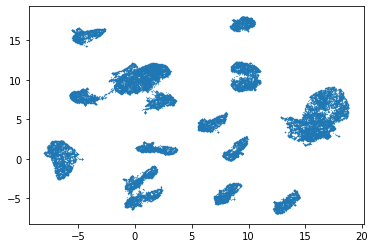

In [18]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=0.05);


# Grid assignment using LAPJV 

The cosine distance between two vectors

$$ \frac{u \cdot v}{{||u||}_2 {||v||}_2}$$

In [24]:
length = 2 * N

size1 = int(np.ceil(np.sqrt(length)))
size2 = int(np.ceil(length/size1))
grid_size = (size1, size2)

grid = np.dstack(np.meshgrid(np.linspace(0, 1, size2), 
                             np.linspace(0, 1, size1))).reshape(-1, 2)
grid_map = grid[:length]
cost_matrix = cdist(grid_map, embedding, "sqeuclidean").astype(np.float)
cost_matrix = cost_matrix * (100000 / cost_matrix.max())
row_asses, col_asses, _ = lapjv(cost_matrix)


/home/ma/miniconda3/envs/molmap/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.
